# Preprocessing

## Import library and load data

In [1]:
#from google.colab import drive 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px
import plotly.graph_objects as go
from scipy.stats import gaussian_kde
import numpy as np
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
import joblib
from sklearn.svm import SVC
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.neighbors import KNeighborsClassifier
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.ensemble import RandomForestClassifier
from joblib import dump





In [7]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
ls

credit_risk_dataset.csv           Decision_tree_model_loan.pkl
Decision_tree_model_grade.joblib  KNN_model_loan_grade.joblib
Decision_tree_model_grade.pkl     KNN_model_loan_status.joblib
Decision_tree_model.joblib        Random_forest_model_loan_status.joblib


In [8]:
%cd /content/drive/MyDrive/Data Credit Risk

/content/drive/MyDrive/Data Credit Risk


In [2]:
dataset = pd.read_csv('credit_risk_dataset.csv')
dataset

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


## features Selection 

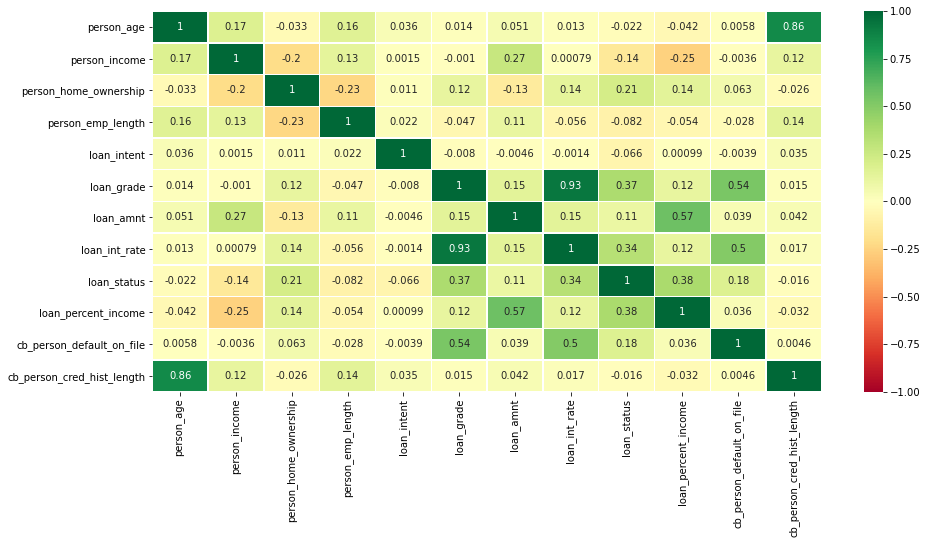

In [3]:
plt.figure(figsize = (15,7))

sns.heatmap(dataset.assign(person_home_ownership = dataset.person_home_ownership.astype('category').cat.codes,
                           loan_intent = dataset.loan_intent.astype('category').cat.codes,
                           loan_grade = dataset.loan_grade.astype('category').cat.codes,
                           cb_person_default_on_file = dataset.cb_person_default_on_file.astype('category').cat.codes).corr(),
            annot = True, cmap ='RdYlGn', vmin = -1, vmax = 1, linewidths = 0.5)
plt.show()

Drop features

In [4]:
features_drop = ['cb_person_cred_hist_length', 'cb_person_default_on_file','loan_percent_income', 'loan_int_rate',]

for col in features_drop:
  dataset = dataset.drop(col,axis=1)

dropna Values and unknow data

In [5]:
dataset = dataset.dropna()
dataset = dataset.drop(dataset[dataset['person_emp_length'] == 123].index)
dataset = dataset.drop(dataset[(dataset['person_age'] == 144) | (dataset['person_age'] == 123)].index)

# Analysist Data

## Analysist Features Person Age

In [ ]:
dataset.sort_values('person_age', ascending = False)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_status
32416,94,24000,RENT,1.0,MEDICAL,C,6500,0
32506,84,94800,MORTGAGE,2.0,PERSONAL,A,10000,0
32422,80,64000,RENT,7.0,MEDICAL,B,6800,0
32355,78,48000,RENT,41.0,MEDICAL,A,3000,0
32534,76,75000,RENT,23.0,MEDICAL,A,15000,0
...,...,...,...,...,...,...,...,...
3851,20,32652,MORTGAGE,0.0,PERSONAL,D,6000,1
14827,20,115731,MORTGAGE,4.0,DEBTCONSOLIDATION,B,9625,0
15417,20,135000,MORTGAGE,1.0,VENTURE,C,15000,0
5648,20,94000,RENT,4.0,EDUCATION,D,5000,0


<function matplotlib.pyplot.show(close=None, block=None)>

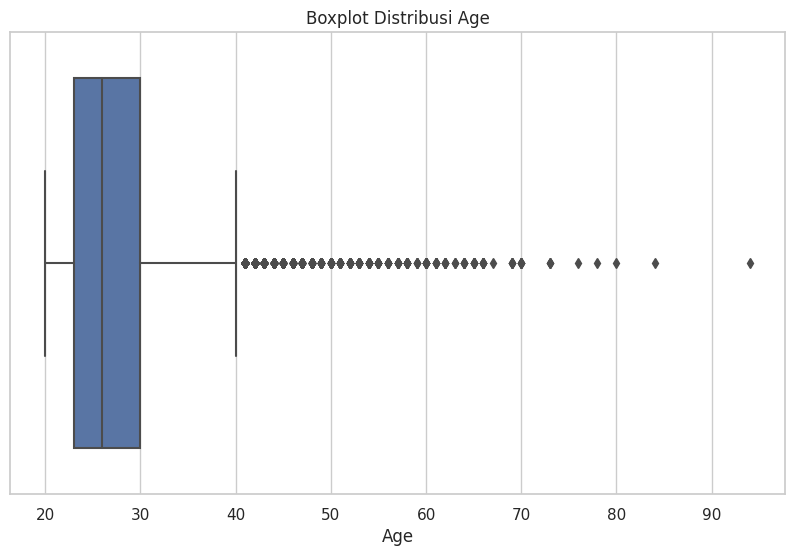

In [ ]:

sns.set(style = 'whitegrid')
plt.figure(figsize = (10,6))
sns.boxplot(x = dataset['person_age'])
plt.title('Boxplot Distribusi Age')
plt.xlabel('Age')
plt.show

In [ ]:
def plot_dis(dataset):
  kde = gaussian_kde(dataset)
  x = np.linspace(dataset.min(), dataset.max())
  y = kde(x)

  plot_dis = px.histogram(x = dataset, nbins = 50, opacity = 0.5)

  plot_dis.add_trace(go.Scatter(x = x,
                                y = y,
                                name = 'Density',
                                yaxis = 'y2',
                                line = dict(color = 'red', width = 3)))
  plot_dis.update_layout(bargroupgap = 0.2)
  plot_dis.update_layout(yaxis2 = dict(title = 'Density',
                                       title_font = dict(family = 'arial'),
                                       overlaying = 'y', side = 'right'))
  return plot_dis

In [ ]:
plot_dis(dataset['person_age'])

In [ ]:
data_age = dataset

bins = [20,30,50,60,85]
labels = ['20-29', '30-49', '50-59','60-84']

data_age['age_group'] = pd.cut(dataset['person_age'], bins= bins, labels = labels)

data_age_loan = data_age.groupby('age_group').agg({'loan_amnt': 'mean'}).reset_index()

plot_age_loan = px.bar(data_age_loan, x = 'age_group', y = 'loan_amnt')
plot_age_loan.show()


In [ ]:
data_age_annual = data_age.groupby('age_group').agg({'person_income': 'mean'}).reset_index()
plot_age_annual = px.bar(data_age_annual, x = 'age_group', y = 'person_income')
plot_age_annual.show()

In [ ]:
data_age


,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_status,age_group
1,21,9600,OWN,5.0,EDUCATION,B,1000,0,20-29
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,1,20-29
3,23,65500,RENT,4.0,MEDICAL,C,35000,1,20-29
4,24,54400,RENT,8.0,MEDICAL,C,35000,1,20-29
5,21,9900,OWN,2.0,VENTURE,A,2500,1,20-29
...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,0,50-59
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,0,50-59
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,1,60-84
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,0,50-59


In [ ]:
data_age_loan_status = data_age.groupby(['loan_status', 'age_group'])['age_group'].count().reset_index(name = 'count')
data_age_loan_status

,loan_status,age_group,count
0,0,20-29,18811
1,0,30-49,5822
2,0,50-59,161
3,0,60-84,46
4,1,20-29,5297
5,1,30-49,1455
6,1,50-59,54
7,1,60-84,17


In [ ]:
# Membuat contoh data frame
# Create the bar chart
data_age_loan_status = data_age_loan_status.sort_values('count')
plot_age_loan_status = px.bar(data_age_loan_status, x = 'age_group', y = 'count', barmode = 'group', color = 'loan_status', template = 'ggplot2')
plot_age_loan_status.show()

In [ ]:
data_age_home = data_age.groupby(['age_group', 'person_home_ownership'])['person_home_ownership'].count().reset_index(name = 'count')
data_age_home

,age_group,person_home_ownership,count
0,20-29,MORTGAGE,9812
1,20-29,OTHER,89
2,20-29,OWN,1816
3,20-29,RENT,12391
4,30-49,MORTGAGE,3168
5,30-49,OTHER,18
6,30-49,OWN,574
7,30-49,RENT,3517
8,50-59,MORTGAGE,77
9,50-59,OTHER,0


In [ ]:
plot_age_home = px.bar(data_age_home, x = 'person_home_ownership', y = 'count', color = 'age_group', barmode = 'group')
plot_age_home.show()

In [ ]:
data_age

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_status,age_group
1,21,9600,OWN,5.0,EDUCATION,B,1000,0,20-29
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,1,20-29
3,23,65500,RENT,4.0,MEDICAL,C,35000,1,20-29
4,24,54400,RENT,8.0,MEDICAL,C,35000,1,20-29
5,21,9900,OWN,2.0,VENTURE,A,2500,1,20-29
...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,0,50-59
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,0,50-59
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,1,60-84
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,0,50-59


## Analysist Person Home Ownership

In [ ]:
data_home_ownership = dataset


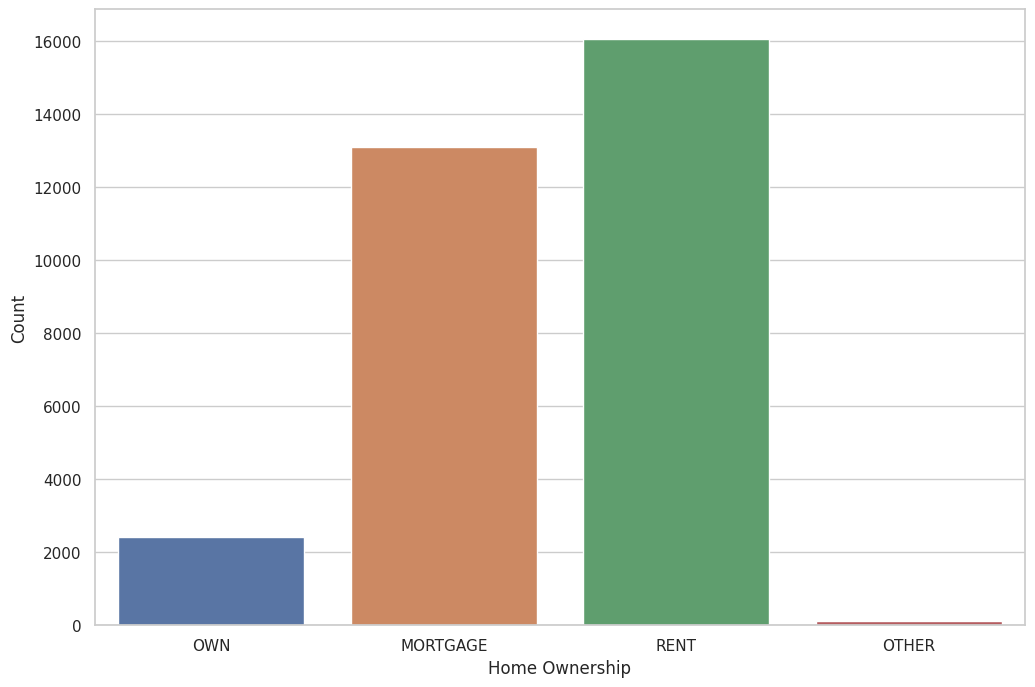

In [ ]:

plt.figure(figsize = (12,8))
sns.countplot(data_home_ownership, x = 'person_home_ownership')
plt.xlabel('Home Ownership')
plt.ylabel('Count')
plt.show()

In [ ]:
data_home_income = data_home_ownership.groupby('person_home_ownership')['person_income'].mean().reset_index()
data_home_income

,person_home_ownership,person_income
0,MORTGAGE,81274.657448
1,OTHER,76387.803738
2,OWN,59165.828631
3,RENT,55481.050523


In [ ]:
plot_home_income = px.bar(data_home_income, x= 'person_home_ownership', y = 'person_income')
plot_home_income.show()

In [ ]:
data_home_loan = data_home_ownership.groupby('person_home_ownership')['loan_amnt'].mean().reset_index()
data_home_loan

,person_home_ownership,loan_amnt
0,MORTGAGE,10645.481283
1,OTHER,11074.532710
2,OWN,9161.327801
3,RENT,8922.649639


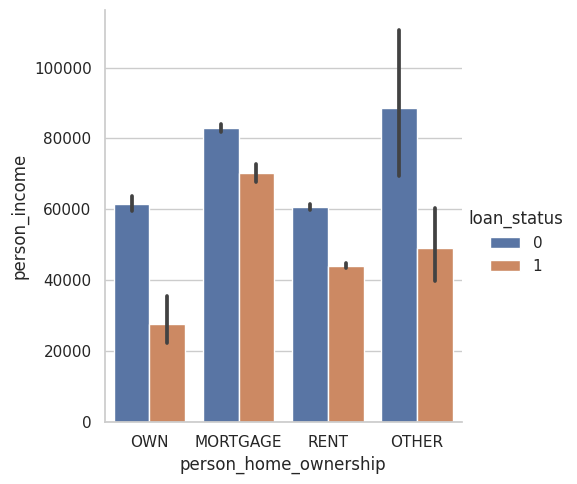

In [ ]:

sns.catplot(data = data_home_ownership, kind = 'bar', x = 'person_home_ownership', y = 'person_income', hue = 'loan_status')

In [ ]:
data_home_loan_status = data_home_ownership.groupby(['person_home_ownership', 'loan_status'])['loan_status'].count().reset_index(name = 'count')
data_home_loan_status

,person_home_ownership,loan_status,count
0,MORTGAGE,0,11460
1,MORTGAGE,1,1630
2,OTHER,0,74
3,OTHER,1,33
4,OWN,0,2243
5,OWN,1,167
6,RENT,0,11077
7,RENT,1,4995


<Figure size 1200x800 with 0 Axes>

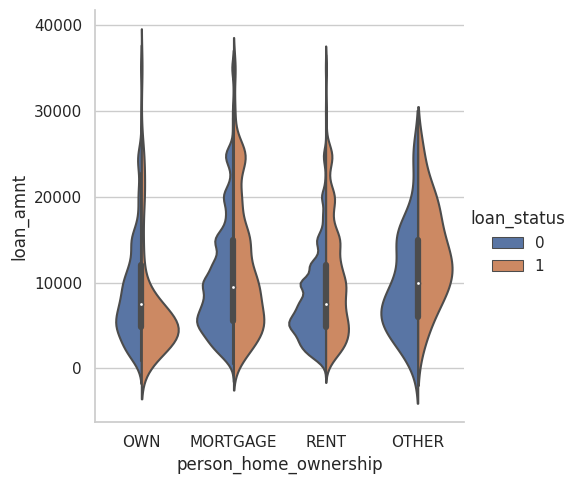

In [ ]:
plt.figure(figsize = (12,8))
sns.catplot(data= data_home_ownership, kind= 'violin', x = 'person_home_ownership', y = 'loan_amnt', hue= 'loan_status',split = True)

##Analysist Loan Intent

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'EDUCATION'),
  Text(1, 0, 'MEDICAL'),
  Text(2, 0, 'VENTURE'),
  Text(3, 0, 'PERSONAL'),
  Text(4, 0, 'HOMEIMPROVEMENT'),
  Text(5, 0, 'DEBTCONSOLIDATION')])

<Figure size 1200x1500 with 0 Axes>

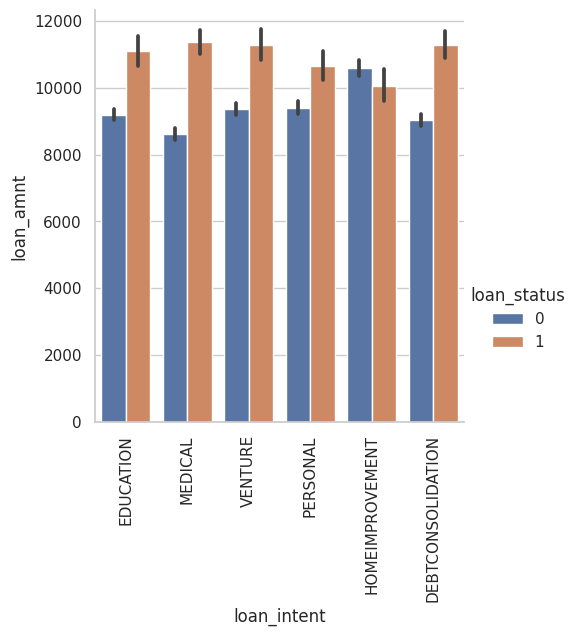

In [ ]:
plt.figure(figsize = (12,15))
ax =sns.catplot(data = dataset, x = 'loan_intent', y  = 'loan_amnt', hue = 'loan_status',kind = 'bar')

# rotate x-axis tick labels
plt.xticks(rotation=90)


## Analysist Loan Grade

In [6]:
data_grade_loan = dataset.groupby(['loan_grade','loan_status'])['loan_amnt'].mean().reset_index()
data_grade_loan

,loan_grade,loan_status,loan_amnt
0,A,0,8472.355795
1,A,1,9821.190716
2,B,0,9809.236655
3,B,1,11471.485820
4,C,0,9018.084790
5,C,1,10306.352299
6,D,0,11147.118008
7,D,1,10698.839157
8,E,0,13463.196481
9,E,1,12645.294599


In [8]:
data_grade_loan['loan_status']  = data_grade_loan['loan_status'].replace([1], 'Charge Off')
data_grade_loan['loan_status']  = data_grade_loan['loan_status'].replace([0], 'Fully Pain')
data_grade_loan

,loan_grade,loan_status,loan_amnt
0,A,Fully Pain,8472.355795
1,A,Charge Off,9821.190716
2,B,Fully Pain,9809.236655
3,B,Charge Off,11471.485820
4,C,Fully Pain,9018.084790
5,C,Charge Off,10306.352299
6,D,Fully Pain,11147.118008
7,D,Charge Off,10698.839157
8,E,Fully Pain,13463.196481
9,E,Charge Off,12645.294599


In [11]:
plot_grade_loan = px.bar(data_grade_loan, x = 'loan_grade', y = 'loan_amnt', color = 'loan_status', barmode = 'group')
plot_grade_loan.show()

In [ ]:
dataset

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_status,age_group
1,21,9600,OWN,5.0,EDUCATION,B,1000,0,20-29
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,1,20-29
3,23,65500,RENT,4.0,MEDICAL,C,35000,1,20-29
4,24,54400,RENT,8.0,MEDICAL,C,35000,1,20-29
5,21,9900,OWN,2.0,VENTURE,A,2500,1,20-29
...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,0,50-59
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,0,50-59
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,1,60-84
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,0,50-59


In [ ]:
data_grade_age = dataset.groupby(['loan_grade', 'age_group'])['age_group'].count().reset_index(name = 'count')
data_grade_age

,loan_grade,age_group,count
0,A,20-29,7906
1,A,30-49,2370
2,A,50-59,70
3,A,60-84,20
4,B,20-29,7785
5,B,30-49,2306
6,B,50-59,71
7,B,60-84,16
8,C,20-29,4794
9,C,30-49,1467


In [ ]:
plot_grade_age = px.bar(data_grade_age, x = 'loan_grade', y = 'count', color = 'age_group', barmode = 'group')
plot_grade_age.show()

In [ ]:
data_grade_income_status = dataset.groupby(['loan_grade', 'loan_status'])['person_income'].mean().reset_index()
data_grade_income_status

,loan_grade,loan_status,person_income
0,A,0,70396.985073
1,A,1,38594.000000
2,B,0,71031.481019
3,B,1,45269.714550
4,C,0,69406.754170
5,C,1,45191.114575
6,D,0,75972.293997
7,D,1,55707.565821
8,E,0,86714.797654
9,E,1,62484.278232


In [ ]:
plot_grade_income_status = px.bar(data_grade_income_status,x = 'loan_grade', y = 'person_income', color = 'loan_status', barmode = 'group')
plot_grade_income_status.show()

In [ ]:
data_grade_home = dataset.groupby(['loan_grade', 'person_home_ownership'])['person_home_ownership'].count().reset_index(name = 'count')
data_grade_home

,loan_grade,person_home_ownership,count
0,A,MORTGAGE,5255
1,A,OTHER,26
2,A,OWN,832
3,A,RENT,4257
4,B,MORTGAGE,3958
5,B,OTHER,34
6,B,OWN,760
7,B,RENT,5431
8,C,MORTGAGE,2220
9,C,OTHER,17


In [ ]:
plot_grade_home = px.bar(data_grade_home, x = 'person_home_ownership', y = 'count', color = 'loan_grade', barmode = 'group')
plot_grade_home.show()

## Analysist person Income

In [15]:
data_income = dataset.groupby('loan_status')['person_income'].mean().reset_index()
data_income['loan_status']  = data_income['loan_status'].replace([1], 'Charge Off')
data_income['loan_status']  = data_income['loan_status'].replace([0], 'Fully Pain')

In [17]:
plot_income = px.bar(data_income, x = 'person_income', y = 'loan_status')
plot_income.show()

## Analysist Loan_status

In [ ]:
dataset

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_status,age_group
1,21,9600,OWN,5.0,EDUCATION,B,1000,0,20-29
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,1,20-29
3,23,65500,RENT,4.0,MEDICAL,C,35000,1,20-29
4,24,54400,RENT,8.0,MEDICAL,C,35000,1,20-29
5,21,9900,OWN,2.0,VENTURE,A,2500,1,20-29
...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,0,50-59
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,0,50-59
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,1,60-84
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,0,50-59


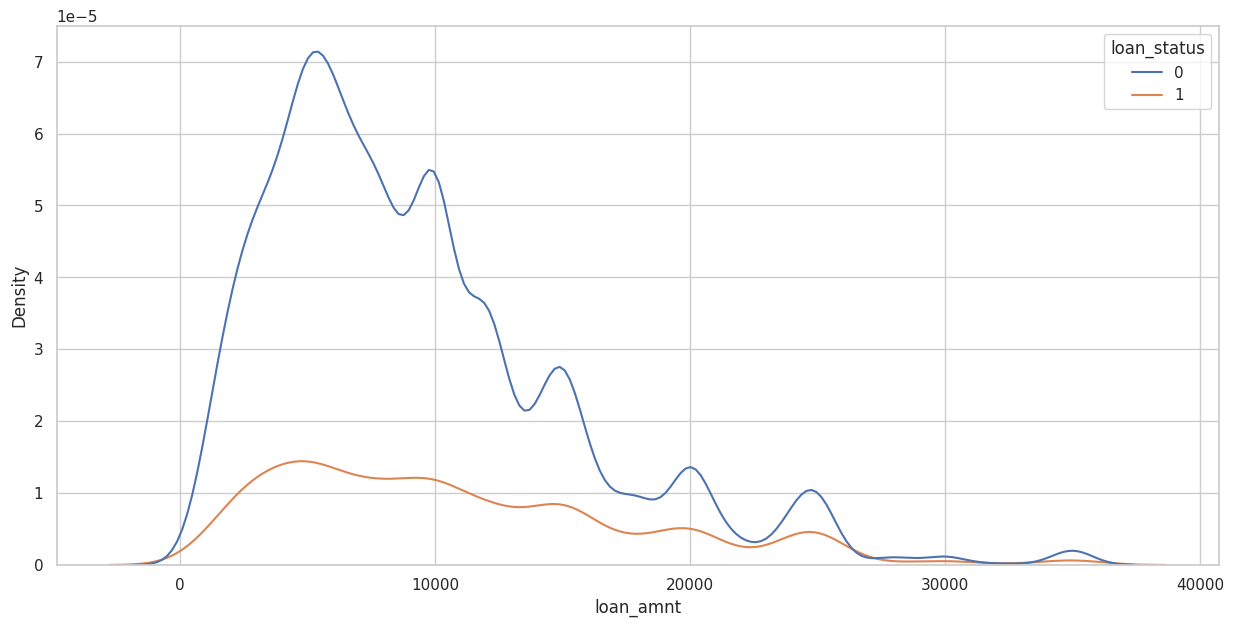

In [ ]:
plt.figure(figsize = (15,7))
sns.kdeplot(data = dataset, x = 'loan_amnt', hue = 'loan_status')

plt.show()

In [ ]:
dataset

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_status,age_group
1,21,9600,OWN,5.0,EDUCATION,B,1000,0,20-29
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,1,20-29
3,23,65500,RENT,4.0,MEDICAL,C,35000,1,20-29
4,24,54400,RENT,8.0,MEDICAL,C,35000,1,20-29
5,21,9900,OWN,2.0,VENTURE,A,2500,1,20-29
...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,0,50-59
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,0,50-59
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,1,60-84
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,0,50-59


In [ ]:
data_loan_status = dataset.groupby('loan_status')['loan_status'].count().reset_index(name = 'count')
data_loan_status

,loan_status,count
0,0,24854
1,1,6825


In [ ]:
pie_loan_status = px.pie(data_loan_status, values = 'count' ,names = 'loan_status', color= 'loan_status', template = 'ggplot2')
pie_loan_status.show()

# Machine Learning

## Outlier


In [13]:
dataset

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_status
1,21,9600,OWN,5.0,EDUCATION,B,1000,0
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,1
3,23,65500,RENT,4.0,MEDICAL,C,35000,1
4,24,54400,RENT,8.0,MEDICAL,C,35000,1
5,21,9900,OWN,2.0,VENTURE,A,2500,1
...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,0
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,0
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,1
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,0


In [22]:
def plot_boxplot(dataset):
  column_outlier = ['person_age', 'person_income', 'person_emp_length', 'loan_amnt']

  for col in column_outlier:
    sns.set(style = 'whitegrid')
    plt.figure(figsize = (10,6))
    sns.boxplot(x=dataset[col])
    plt.title(f'Boxplot Outlier {col}')
    plt.show()

def remove_outlier(dataset):
  column_outlier = ['person_age', 'person_income', 'person_emp_length', 'loan_amnt']

  for col in column_outlier:
    Q1 = dataset[col].quantile(0.25)
    Q3 = dataset[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - (1.5 * IQR)
    upper_bound = Q3 + (0.4 * IQR)

    dataset = dataset[(dataset[col] > lower_bound) & (dataset[col] < upper_bound)]

    return dataset


    



In [ ]:
plot_boxplot(dataset)

In [26]:
dataset = remove_outlier(dataset)

## Encode and Normalization

In [27]:
dataset['loan_grade']  = dataset['loan_grade'].replace(['D','E','F','G'], 'D')
dataset

<ipython-input-27-1933a5bb3da2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['loan_grade']  = dataset['loan_grade'].replace(['D','E','F','G'], 'D')


,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_status
1,21,9600,OWN,5.0,EDUCATION,B,1000,0
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,1
3,23,65500,RENT,4.0,MEDICAL,C,35000,1
4,24,54400,RENT,8.0,MEDICAL,C,35000,1
5,21,9900,OWN,2.0,VENTURE,A,2500,1
...,...,...,...,...,...,...,...,...
29114,31,83000,MORTGAGE,9.0,VENTURE,D,18000,1
29115,29,61656,RENT,4.0,PERSONAL,A,15000,0
29116,32,30000,RENT,1.0,EDUCATION,B,11450,1
29117,31,26010,MORTGAGE,2.0,PERSONAL,B,6500,0


In [28]:
dataset = dataset.dropna()

dataset = dataset.sort_values('loan_grade')
# encode kategorikal features
categorical_features = ['person_home_ownership', 'loan_intent', 'loan_grade']
# person_home_ownership = {rent : 3, own : 2, mortgage : 0, other : 1}
# loan_intet = {Debtconsolidation : 0, Venture : 5, Medical : 3, Education : 1, Homeimprovement : 2, Personal : 4}
#loan_grade = {A : 0, B : 1, C : 2, D : 3, E : 4, F : 5, G : 6}

for col in categorical_features:
  le = LabelEncoder()
  dataset[col] = le.fit_transform(dataset[col])

numerical_features = ['person_age', 'person_income', 'person_emp_length','loan_amnt']

for col in numerical_features:
  scaler  = MinMaxScaler()
  dataset[col] = scaler.fit_transform(dataset[[col]])

dataset     


,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_status
6701,0.416667,0.038397,2,0.176471,3,0,0.275362,0
19086,0.750000,0.030373,3,0.235294,5,0,0.391304,1
7959,0.416667,0.042578,0,0.529412,3,0,0.420290,0
19077,0.833333,0.024349,3,0.235294,5,0,0.391304,1
7963,0.333333,0.037561,3,0.470588,1,0,0.188406,1
...,...,...,...,...,...,...,...,...
20609,0.583333,0.130377,3,0.176471,1,3,0.275362,0
20608,0.833333,0.120342,3,0.470588,4,3,0.275362,0
6743,0.250000,0.017726,3,0.411765,4,3,0.192029,0
20636,0.666667,0.023681,3,0.176471,3,3,0.127536,1


## Train test Split

In [ ]:
# split dataset into train and test set
X = dataset.drop(['loan_status', 'loan_grade'], axis=1)
y_loan_status = dataset['loan_status']
y_loan_grade = dataset['loan_grade']
X_train, X_test, y_train_loan_status, y_test_loan_status = train_test_split(X, y_loan_status, test_size=0.2, random_state=42)
X_train, X_test, y_train_loan_grade, y_test_loan_grade = train_test_split(X, y_loan_grade, test_size=0.2, random_state=42)



## Resampling Imbalance Data

###Variabel Target Loan_status

In [ ]:
data_plot_y_loan = y_train_loan_status.reset_index().drop('index',axis = 1)
data_plot_y_loan = data_plot_y_loan.groupby('loan_status')['loan_status'].count().reset_index(name = 'count')
data_plot_y_loan


,loan_status,count
0,0,19927
1,1,5416


In [ ]:
plot_loan_imbelance = px.bar(data_plot_y_loan, x = 'loan_status', y = 'count')
plot_loan_imbelance.show()




In [ ]:

# Lakukan SMOTE pada subset training
# Lakukan Random Oversampling pada subset training
ros = RandomOverSampler(random_state=42)
X_train_resampled_loan, y_train_resampled_loan = ros.fit_resample(X_train, y_train_loan_status)
X_train_resampled_loan

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_amnt
0,0.121622,0.020140,3,0.219512,4,0.391304
1,0.270270,0.033943,3,0.000000,3,0.565217
2,0.121622,0.046591,3,0.146341,0,0.347826
3,0.121622,0.029964,0,0.170732,4,0.188406
4,0.121622,0.014540,0,0.073171,3,0.333333
...,...,...,...,...,...,...
39849,0.027027,0.017192,3,0.024390,2,0.147826
39850,0.027027,0.027017,1,0.073171,3,0.333333
39851,0.229730,0.016851,3,0.073171,4,0.333333
39852,0.081081,0.065822,0,0.097561,1,0.507246


In [ ]:
data_plot_y_loan_resampled = y_train_resampled_loan.reset_index().drop('index', axis = 1)
data_plot_y_loan_resampled = data_plot_y_loan_resampled.groupby('loan_status')['loan_status'].count().reset_index(name = 'count')
data_plot_y_loan_resampled

,loan_status,count
0,0,19927
1,1,19927


###Variabel Target Grade

In [ ]:
data_plot_y_grade = y_train_loan_grade.reset_index().drop('index',axis = 1)
data_plot_y_grade = data_plot_y_grade.groupby('loan_grade')['loan_grade'].count().reset_index(name = 'count')
data_plot_y_grade


,loan_grade,count
0,0,8295
1,1,8141
2,2,5046
3,3,3861


In [ ]:
plot_loan_imbelance = px.bar(data_plot_y_grade, x = 'loan_grade', y = 'count')
plot_loan_imbelance.show()

In [ ]:
# Lakukan SMOTE pada subset training
# Lakukan Random Oversampling pada subset training
ros = RandomOverSampler(random_state=42)
X_train_resampled_grade, y_train_resampled_grade = ros.fit_resample(X_train, y_train_loan_grade)
X_train_resampled_grade

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_amnt
0,0.121622,0.020140,3,0.219512,4,0.391304
1,0.270270,0.033943,3,0.000000,3,0.565217
2,0.121622,0.046591,3,0.146341,0,0.347826
3,0.121622,0.029964,0,0.170732,4,0.188406
4,0.121622,0.014540,0,0.073171,3,0.333333
...,...,...,...,...,...,...
33175,0.229730,0.054033,3,0.243902,5,0.710145
33176,0.054054,0.051086,0,0.121951,1,0.273913
33177,0.054054,0.039786,2,0.097561,0,0.217391
33178,0.040541,0.041262,3,0.000000,4,0.333333


In [ ]:
data_plot_y_grade_resampled = y_train_resampled_grade.reset_index().drop('index', axis = 1)
data_plot_y_grade_resampled = data_plot_y_grade_resampled.groupby('loan_grade')['loan_grade'].count().reset_index(name = 'count')
data_plot_y_grade_resampled

,loan_grade,count
0,0,8295
1,1,8295
2,2,8295
3,3,8295


## Modelling

### Decision Tree

Best Parameters : 
 {'criterion': 'entropy', 'max_depth': None, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}

Best Estimator: 
 DecisionTreeClassifier(criterion='entropy')

 Classification Report: 
               precision    recall  f1-score   support

           0       0.89      0.89      0.89      4927
           1       0.61      0.61      0.61      1409

    accuracy                           0.83      6336
   macro avg       0.75      0.75      0.75      6336
weighted avg       0.83      0.83      0.83      6336



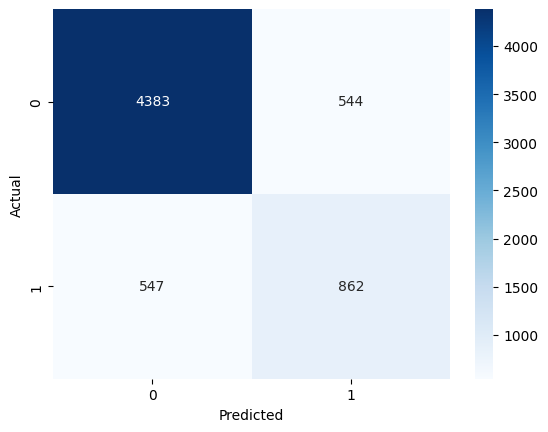

In [ ]:
param_grid = {'max_depth' :[10,20, 30,40,50, None],
              'max_features' : ['sqrt', 'log2', 'auto', None],
              'min_samples_split' : [2,5,10,12,15],
              'min_samples_leaf': [1,2,4,6,8,12],
              'splitter' :['best', 'random'],
              'criterion': ['gini', 'entropy', 'log_loss']}

dt = DecisionTreeClassifier()
grid = GridSearchCV(dt, param_grid=param_grid, cv = 5,n_jobs = -1)
grid.fit(X_train_resampled_loan, y_train_resampled_loan)

print("Best Parameters : \n" , grid.best_params_)
print("\nBest Estimator: \n", grid.best_estimator_)

y_pred_loan= grid.predict(X_test)
print("\n Classification Report: \n", classification_report(y_test_loan_status, y_pred_loan))
cm = confusion_matrix(y_test_loan_status, y_pred_loan)

sns.heatmap(cm, annot = True, cmap = 'Blues', fmt = 'g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning:


7200 fits failed out of a total of 11520.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
2160 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py", line 889, in fit
    super().fit(
  File "/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py", line 177, in fit
    self._validate_params()
  File "/usr/local/lib/python3.9/dist-packages/sklearn/base.py", line 600, in _vali

Best Parameters : 
 {'criterion': 'entropy', 'max_depth': 50, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}

Best Estimator: 
 DecisionTreeClassifier(criterion='entropy', max_depth=50)

 Classification Report: 
               precision    recall  f1-score   support

           0       0.42      0.41      0.42      2075
           1       0.39      0.40      0.40      2042
           2       0.29      0.29      0.29      1273
           3       0.30      0.29      0.30       946

    accuracy                           0.37      6336
   macro avg       0.35      0.35      0.35      6336
weighted avg       0.37      0.37      0.37      6336



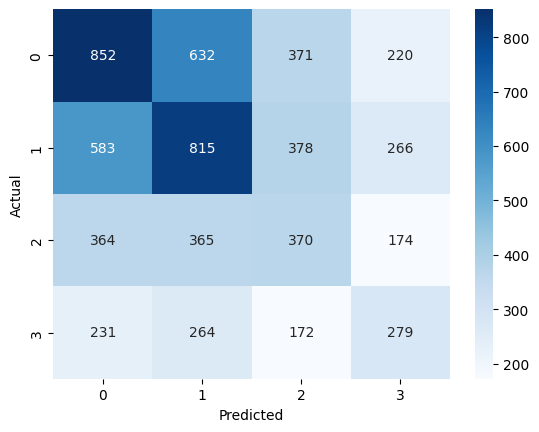

In [ ]:
param_grid = {'max_depth' :[10,20, 30,40,50, None],
              'max_features' : ['sqrt', 'log2', 'auto', None],
              'min_samples_split' : [1,2,3,None],
              'min_samples_leaf': [1,2,3, None],
              'splitter' :['best', 'random'],
              'criterion': ['gini', 'entropy', 'log_loss']}

dt = DecisionTreeClassifier()
grid = GridSearchCV(dt, param_grid=param_grid, cv = 5,n_jobs = -1)
grid.fit(X_train_resampled_grade, y_train_resampled_grade)

print("Best Parameters : \n" , grid.best_params_)
print("\nBest Estimator: \n", grid.best_estimator_)

y_pred_grade= grid.predict(X_test)
print("\n Classification Report: \n", classification_report(y_test_loan_grade, y_pred_grade))
cm = confusion_matrix(y_test_loan_grade, y_pred_grade)

sns.heatmap(cm, annot = True, cmap = 'Blues', fmt = 'g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
from joblib import dump
dump(grid, 'Decision_tree_model_loan.pkl')

['Decision_tree_model_loan.pkl']

In [ ]:
from joblib import dump
dump(grid, 'Decision_tree_model_grade.pkl')

['Decision_tree_model_grade.pkl']

## SVM

In [ ]:
svc = SVC()

parameters = {'kernel': ['linear', 'rbf'], 
             'C': [0.1, 1, 10, 100], 
             'gamma': [0.01, 0.1, 1, 10],
              'degree' : [3,6,10,40,50],
              'max_iter' : [10,20,40,60,70,100],
              }


model_svm = GridSearchCV(svc, parameters)
model_svm.fit(X_train_resampled_loan, y_train_resampled_loan)


print('Best Parameters : \n', model_svm.best_params_)
print('\nBest Estimator : \n', model_svm.best_estimator_)

y_pred_loan = model_svm.predict(X_test)
print('\n Classification Report : \n', classification_report(y_test_loan_status, y_pred_loan))

cm = confusion_matrix(y_test_loan_status, y_pred_loan)
sns.heatmap(cm, annot = True, cmap = 'Blues', fmt = 'g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()



In [ ]:
dump(model_svm, 'SVM_model_grade.joblib')

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-35-b70d3ee620a7>", line 1, in <cell line: 1>
    dump(model_svm, 'model/SVM_model_loan_status.joblib')
  File "/usr/local/lib/python3.9/dist-packages/joblib/numpy_pickle.py", line 481, in dump
    with open(filename, 'wb') as f:
OSError: [Errno 107] Transport endpoint is not connected: 'model/SVM_model_loan_status.joblib'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'OSError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.

## ANN

Epoch 1/100
620/620 [==============================] - 4s 4ms/step - loss: 0.6534 - accuracy: 0.6290 - val_loss: 0.6300 - val_accuracy: 0.6087
Epoch 2/100
620/620 [==============================] - 1s 2ms/step - loss: 0.6434 - accuracy: 0.6404 - val_loss: 0.6376 - val_accuracy: 0.6003
Epoch 3/100
620/620 [==============================] - 1s 2ms/step - loss: 0.6361 - accuracy: 0.6438 - val_loss: 0.6325 - val_accuracy: 0.6051
Epoch 4/100
620/620 [==============================] - 1s 2ms/step - loss: 0.6258 - accuracy: 0.6505 - val_loss: 0.6156 - val_accuracy: 0.6303
Epoch 5/100
620/620 [==============================] - 2s 3ms/step - loss: 0.6159 - accuracy: 0.6578 - val_loss: 0.6185 - val_accuracy: 0.6458
Epoch 6/100
620/620 [==============================] - 2s 3ms/step - loss: 0.6072 - accuracy: 0.6663 - val_loss: 0.6055 - val_accuracy: 0.6676
Epoch 7/100
620/620 [==============================] - 2s 3ms/step - loss: 0.5988 - accuracy: 0.6725 - val_loss: 0.5837 - val_accuracy: 0.6929

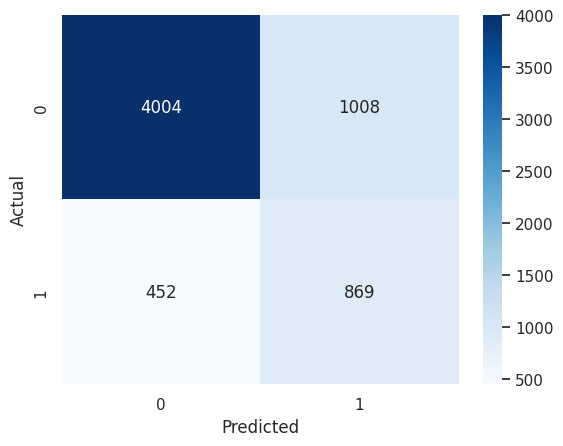

In [ ]:
model_ann = Sequential()
model_ann.add(Dense(6, input_dim = X_train_resampled_loan.shape[1], activation = 'relu'))
model_ann.add(Dense(12, activation = 'relu'))
model_ann.add(Dense(1, activation = 'sigmoid'))

model_ann.compile (loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model_ann.fit(X_train_resampled_loan, y_train_resampled_loan, epochs = 100, batch_size = 64, validation_data = (X_test, y_test_loan_status))


y_pred_loan = model_ann.predict(X_test)
threshold = 0.5
y_pred_loan = (y_pred_loan > threshold).astype(int)


print('\n Classification Report : \n', classification_report(y_test_loan_status, y_pred_loan))
cm = confusion_matrix(y_test_loan_status, y_pred_loan)
sns.heatmap(cm, annot = True, cmap = 'Blues', fmt = 'g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## KNN

Hyperparameter terbaik: {'algorithm': 'brute', 'n_neighbors': 2, 'p': 3, 'weights': 'distance'}
Akurasi model KNN: 74.97%
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.85      0.84      4927
           1       0.43      0.41      0.42      1409

    accuracy                           0.75      6336
   macro avg       0.63      0.63      0.63      6336
weighted avg       0.74      0.75      0.75      6336



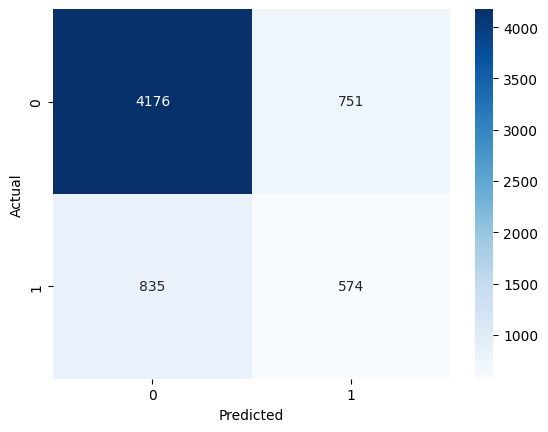

In [ ]:
knn = KNeighborsClassifier()
params = {
    'n_neighbors' : [1,2,5,6,7],
    'weights'     : ['uniform', 'distance'],
    'algorithm'   : ['brute', 'kd_tree', 'ball_tree'],
    'p'           : [2,3,4]
}

grid_search = GridSearchCV(knn, params, cv = 5, n_jobs = -1)

grid_search.fit(X_train_resampled_loan,y_train_resampled_loan)

accuracy = grid_search.score(X_test, y_test_loan_status)
print("Hyperparameter terbaik:", grid_search.best_params_)
print("Akurasi model KNN: {:.2f}%".format(accuracy * 100))

y_pred_loan = grid_search.predict(X_test)
print("Classification Report:\n", classification_report(y_test_loan_status, y_pred_loan))
cm = confusion_matrix(y_test_loan_status, y_pred_loan)
sns.heatmap(cm, annot = True, cmap = 'Blues', fmt = 'g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
from joblib import dump
dump(grid_search, 'KNN_model_loan_status.pkl')

Hyperparameter terbaik: {'algorithm': 'brute', 'n_neighbors': 1, 'p': 2, 'weights': 'uniform'}
Akurasi model KNN: 32.09%
Classification Report:
               precision    recall  f1-score   support

           0       0.39      0.39      0.39      2075
           1       0.34      0.34      0.34      2042
           2       0.24      0.24      0.24      1273
           3       0.23      0.23      0.23       946

    accuracy                           0.32      6336
   macro avg       0.30      0.30      0.30      6336
weighted avg       0.32      0.32      0.32      6336



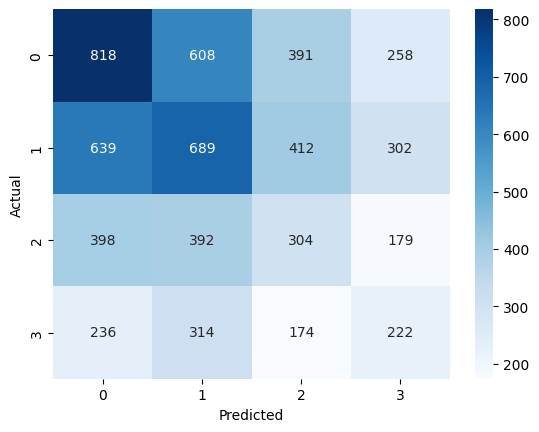

In [ ]:
knn = KNeighborsClassifier()
params = {
    'n_neighbors' : [1,2,5,6,7],
    'weights'     : ['uniform', 'distance'],
    'algorithm'   : ['brute', 'kd_tree', 'ball_tree'],
    'p'           : [2,3,4]
}

grid_search = GridSearchCV(knn, params, cv = 5, n_jobs = -1)

grid_search.fit(X_train_resampled_grade,y_train_resampled_grade)

accuracy = grid_search.score(X_test, y_test_loan_grade)
print("Hyperparameter terbaik:", grid_search.best_params_)
print("Akurasi model KNN: {:.2f}%".format(accuracy * 100))

y_pred_grade = grid_search.predict(X_test)
print("Classification Report:\n", classification_report(y_test_loan_grade, y_pred_grade))
cm = confusion_matrix(y_test_loan_grade, y_pred_grade)
sns.heatmap(cm, annot = True, cmap = 'Blues', fmt = 'g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
from joblib import dump
dump(grid_search, 'KNN_model_loan_grade.joblib')

['KNN_model_loan_grade.joblib']

## XGboost

In [ ]:
import xgboost as xgb
xgb_model = xgb.XGBClassifier(random_state=42)

# Set hyperparameter yang akan di-tune
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.3, 0.5],
    'n_estimators': [50, 100, 200],
    'gamma': [0, 0.1, 0.2],
    'subsample': [0.5, 0.7, 1],
    'colsample_bytree': [0.5, 0.7, 1],
    'reg_alpha': [0, 0.1, 0.5],
    'reg_lambda': [1, 2, 5]
}

# Tuning hyperparameter menggunakan GridSearchCV
grid_search = GridSearchCV(xgb_model, param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train_resampled_loan, y_train_resampled_loan)

accuracy = grid_search.score(X_test, y_test_loan_status)
print("Hyperparameter terbaik:", grid_search.best_params_)
print("Akurasi model KNN: {:.2f}%".format(accuracy * 100))

y_pred_loan = grid_search.predict(X_test)
print("Classification Report:\n", classification_report(y_test_loan_status, y_pred_loan))
cm = confusion_matrix(y_test_loan_status, y_pred_loan)
sns.heatmap(cm, annot = True, cmap = 'Blues', fmt = 'g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:

dump(grid_search, 'Xgboost_model_loan_status.joblib')

In [ ]:
import xgboost as xgb
xgb_model = xgb.XGBClassifier(random_state=42)

# Set hyperparameter yang akan di-tune
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.3, 0.5],
    'n_estimators': [50, 100, 200],
    'gamma': [0, 0.1, 0.2],
    'subsample': [0.5, 0.7, 1],
    'colsample_bytree': [0.5, 0.7, 1],
    'reg_alpha': [0, 0.1, 0.5],
    'reg_lambda': [1, 2, 5]
}

# Tuning hyperparameter menggunakan GridSearchCV
grid_search = GridSearchCV(xgb_model, param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train_resampled_grade, y_train_resampled_grade)

accuracy = grid_search.score(X_test, y_test_loan_grade)
print("Hyperparameter terbaik:", grid_search.best_params_)
print("Akurasi model KNN: {:.2f}%".format(accuracy * 100))

y_pred_grade = grid_search.predict(X_test)
print("Classification Report:\n", classification_report(y_test_loan_grade, y_pred_grade))
cm = confusion_matrix(y_test_loan_grade, y_pred_grade)
sns.heatmap(cm, annot = True, cmap = 'Blues', fmt = 'g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:

dump(grid_search, 'Xgboost_model_loan_grade.joblib')

## Ramdom Forest

Fitting 5 folds for each of 144 candidates, totalling 720 fits
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.7s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.7s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.7s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.7s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.7s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.4s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.7s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   6.2s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   2.0s
[CV] END max_depth=5, min_samples_leaf=1, 

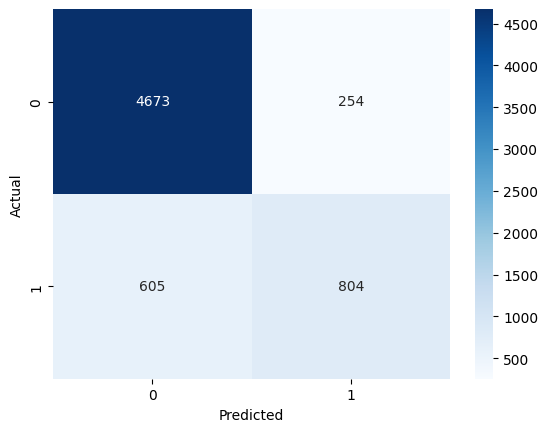

['Random_forest_model_loan_status.joblib']

In [ ]:


rf = RandomForestClassifier(random_state = 42)

param_grid = {
    'n_estimators'      : [50,100,200,400],
    'max_depth'         : [5,10,20,50],
    'min_samples_split' : [2,5,10],
    'min_samples_leaf'  : [1,2,4]
}

grid_search = GridSearchCV(rf, param_grid, cv = 5, n_jobs = 1, verbose =2)
grid_search.fit(X_train_resampled_loan, y_train_resampled_loan)

accuracy = grid_search.score(X_test, y_test_loan_status)
print("Best Parameters\n" )
print(grid_search.best_params_)
print("Akurasi model KNN: {:.2f}%".format(accuracy * 100))

y_pred_loan_status = grid_search.predict(X_test)
print("classification Report :\n", classification_report(y_test_loan_status, y_pred_loan_status))
cm = confusion_matrix(y_test_loan_status, y_pred_loan_status)
sns.heatmap(cm,annot = True, cmap = 'Blues', fmt = 'g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
dump(grid_search, 'Random_forest_model_loan_status.joblib')


Fitting 5 folds for each of 144 candidates, totalling 720 fits
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.7s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.7s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.7s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.7s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.7s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.4s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.9s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.9s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.3s
[CV] END max_depth=5, min_samples_leaf=1, 

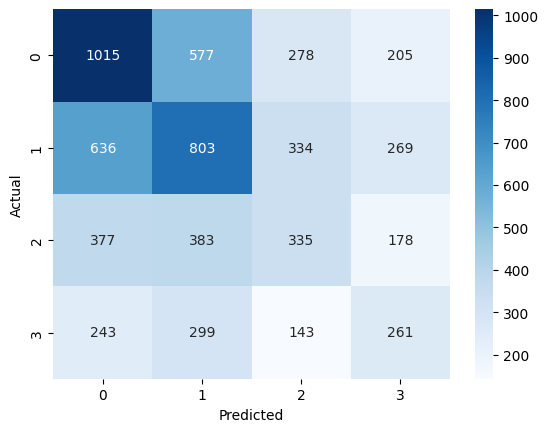

['Random_forest_model_loan_grade.joblib']

In [ ]:
rf = RandomForestClassifier(random_state = 42)

param_grid = {
    'n_estimators'      : [50,100,200,400],
    'max_depth'         : [5,10,20,50],
    'min_samples_split' : [2,5,10],
    'min_samples_leaf'  : [1,2,4]
}

grid_search = GridSearchCV(rf, param_grid, cv = 5, n_jobs = 1, verbose =2)
grid_search.fit(X_train_resampled_grade, y_train_resampled_grade)

accuracy = grid_search.score(X_test, y_test_loan_grade)
print("Best Parameters\n")
print(grid_search.best_params_)
print("Akurasi model KNN: {:.2f}%".format(accuracy * 100))

y_pred_loan_grade = grid_search.predict(X_test)
print("classification Report :\n", classification_report(y_test_loan_grade, y_pred_loan_grade))
cm = confusion_matrix(y_test_loan_grade, y_pred_loan_grade)
sns.heatmap(cm,annot = True, cmap = 'Blues', fmt = 'g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
dump(grid_search, 'Random_forest_model_loan_grade.joblib')


In [ ]:

# Menghitung nilai-nilai untuk pie chart
labels = ['True Negative', 'False Positive', 'False Negative', 'True Positive']
values = [cm[0][0], cm[0][1], cm[1][0], cm[1][1]]

# Membuat pie chart
fig = px.pie(values=values, names=labels, hole=.5)

In [ ]:
from prediction import load_models
from credit_risk_project import X_test, y_test_loan_status
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, recall_score, precision_score
import numpy as np
from tensorflow import keras
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import joblib
from tensorflow.keras.models import load_model


def load_models():
    model_ann_loan = load_model('model/model_ann.h5')
    model_decision_loan = joblib.load('model/Decision_tree_model_loan.joblib')
    model_knn_loan = joblib.load('model/KNN_model_loan_status.joblib')
    model_xgboost_loan = joblib.load('model/Xgboost_model_loan_status.joblib')
    model_forest_loan = joblib.load('model/Random_forest_model_loan_status.joblib')

    return model_ann_loan, model_decision_loan, model_knn_loan, model_xgboost_loan, model_forest_loan

def prediction(X_test, y_test, model): 
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    f1 = f1_score(y_test,y_pred)
    recall = recall_score(y_test, y_pred)
    precision  = precision_score(y_test, y_pred)

    return accuracy,f1, recall, precision

def plot_confusion_matrix(X_test, y_test,model):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot = True, cmap = 'Blues', fmt = 'g')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')

def plot_pie_chart(X_test, y_test,model):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    labels = ['True Negative', 'False Positive', 'False Negative', 'True Positive']
    values = [cm[0][0], cm[0][1], cm[1][0], cm[1][1]]
    fig = px.pie(values=values, names=labels, hole=.5)
    return fig

def performance_model(model_name, X_test = X_test, y_test = y_test_loan_status):

    model_ann_loan, model_decision_loan, model_knn_loan, model_xgboost_loan, model_forest_loan = load_models()

    if model_name == 'Artificial Neural Network':
        model = model_ann_loan
    elif model_name == 'Decision Tree':
        model = model_decision_loan
    elif model_name == 'K-Nearest Neighbors Algorithm':
        model = model_knn_loan
    elif model_name == 'Xgboost':
        model = model_xgboost_loan
    elif model_name == 'Random Forest':
        model = model_forest_loan

    accuracy,f1,recall,precision = prediction(X_test, y_test, model)

    plot_confusion_matrix(X_test, y_test,model)
    pie_chart = plot_pie_chart(X_test, y_test,model)

    return accuracy,f1,recall,precision, pie_chart



Best Parameters : 
 {'criterion': 'log_loss', 'max_depth': 50, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}

Best Estimator: 
 DecisionTreeClassifier(criterion='log_loss', max_depth=50)

 Classification Report: 
               precision    recall  f1-score   support

           0       0.90      0.89      0.89      4128
           1       0.60      0.61      0.61      1108

    accuracy                           0.83      5236
   macro avg       0.75      0.75      0.75      5236
weighted avg       0.83      0.83      0.83      5236



c:\Users\Raffi\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning:


7200 fits failed out of a total of 11520.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
2160 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Raffi\anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Raffi\anaconda\lib\site-packages\sklearn\tree\_classes.py", line 889, in fit
    super().fit(
  File "c:\Users\Raffi\anaconda\lib\site-packages\sklearn\tree\_classes.py", line 177, in fit
    self._validate_params()
  File "c:\Users\Raffi\anaconda\lib\site-packages\sklearn\base.py", lin

Best Parameters : 
 {'criterion': 'entropy', 'max_depth': 40, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}

Best Estimator: 
 DecisionTreeClassifier(criterion='entropy', max_depth=40)

 Classification Report: 
               precision    recall  f1-score   support

           0       0.43      0.40      0.41      1749
           1       0.38      0.39      0.38      1651
           2       0.29      0.30      0.30      1068
           3       0.27      0.29      0.28       768

    accuracy                           0.36      5236
   macro avg       0.34      0.34      0.34      5236
weighted avg       0.36      0.36      0.36      5236



c:\Users\Raffi\anaconda\lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning:

Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.

c:\Users\Raffi\anaconda\lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning:

Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.

c:\Users\Raffi\anaconda\lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning:

Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.

c:\Users\Raffi\anaconda\lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning:

Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.

c:\Users\Raffi\anaconda\lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning:

Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScal

KeyboardInterrupt: 

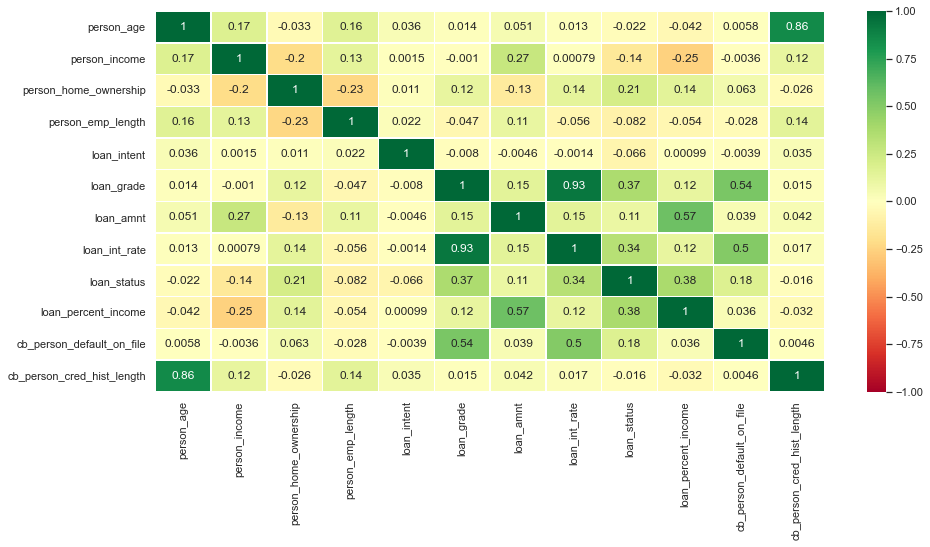

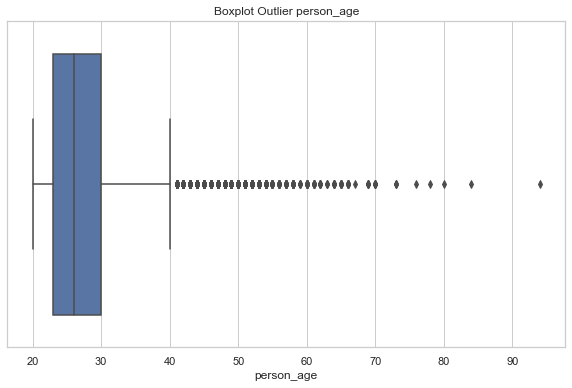

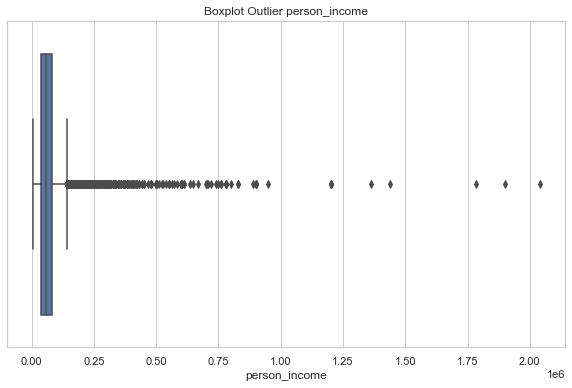

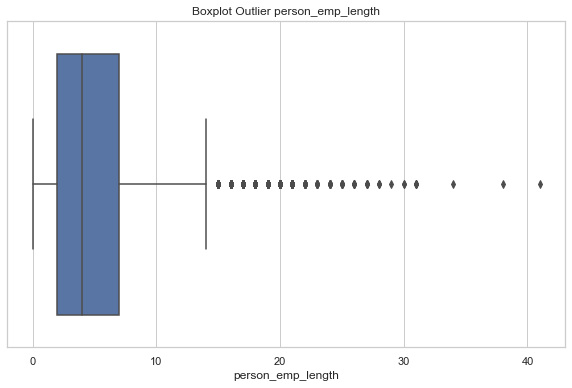

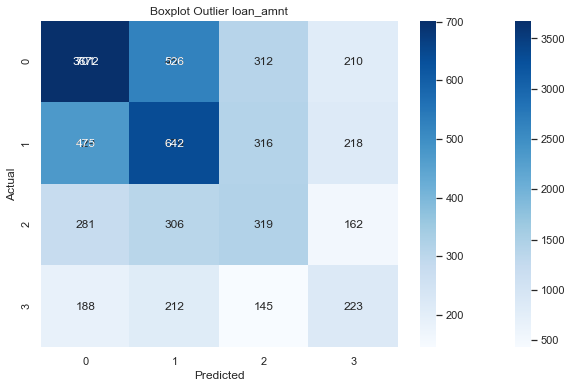

In [19]:
from prediction import load_models
from credit_risk_project import X_test, y_test_loan_status
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, recall_score, precision_score
import numpy as np
from tensorflow import keras
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import joblib
from tensorflow.keras.models import load_model


def load_models():
    model_ann_loan = load_model('model/model_ann.h5')
    model_decision_loan = joblib.load('model/Decision_tree_model_loan.joblib')
    model_knn_loan = joblib.load('model/KNN_model_loan_status.joblib')
    model_xgboost_loan = joblib.load('model/Xgboost_model_loan_status.joblib')
    model_forest_loan = joblib.load('model/Random_forest_model_loan_status.joblib')

In [ ]:
performance_model(model_name ='Artificial Neural Network' ):